In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [3]:
data = pd.read_csv("student_scores.csv")

In [4]:
data.shape

(25, 2)

In [5]:
data.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [6]:
data.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [7]:
data.Hours.quantile(0.25)

2.7

In [8]:
data.Hours.quantile(0.75)

7.4

## Outliers handling

In [9]:
iqr = data.Hours.quantile(0.75) - data.Hours.quantile(0.25) # q3 - q1
iqr

4.7

### values greater than q3 + 1.5iqr -> outliers, values lesser than q3 - 1.5iqr -> outliers

In [10]:
upper_threshold = data.Hours.quantile(0.75) + (1.5 * iqr) # q3 + 1.5iqr
lower_threshold = data.Hours.quantile(0.25) - (1.5 * iqr) # q1 - 1.5iqr
upper_threshold, lower_threshold

(14.450000000000001, -4.3500000000000005)

In [11]:
data.isnull().sum() 
# check for null values

Hours     0
Scores    0
dtype: int64

In [12]:
data = data.drop_duplicates() 
# delete duplicates
data.shape

(25, 2)

In [13]:
data.dtypes 
# check datatypes for each feature

Hours     float64
Scores      int64
dtype: object

# EDA

### Plot between feature and the target variable

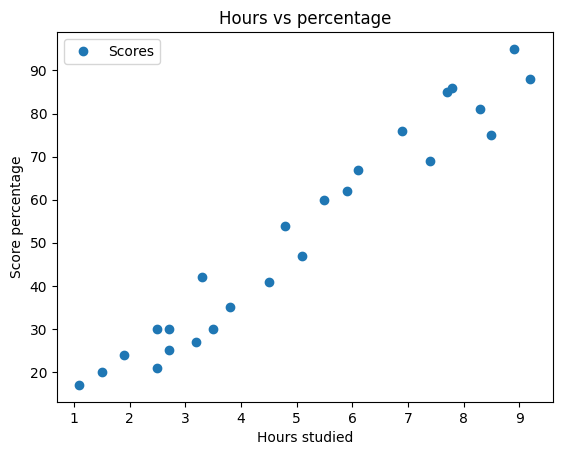

In [14]:
data.plot(x='Hours', y='Scores', style='o')
plt.title('Hours vs percentage')
plt.xlabel('Hours studied')
plt.ylabel('Score percentage')
plt.show()

### There is relationship between feature and target and there is linear relaionship between the feature and the target. So, no transformation is required

In [15]:
data.corr() 
# compute the correlation between the features and target

,Hours,Scores
Hours,1.000000,0.976191
Scores,0.976191,1.000000


### There is a linear relationship between feature(Hours) and target(Scores) - We can go ahead and develop a linear regression model. No transformation required

### Encoding is not required because there is no catagorical data in the dataset

# Split

### Now have to split the data

In [16]:
x = data.loc[:, ['Hours']].values 
# select all rows and column except the last column, which is the feature
y = data.loc[:, 'Scores'].values # target
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=45)

In [17]:
y_test

array([30, 30, 42, 85, 24, 86, 35], dtype=int64)

In [18]:
x_test

array([[2.5],
       [2.7],
       [3.3],
       [7.7],
       [1.9],
       [7.8],
       [3.8]])

In [19]:
x,y

(array([[2.5],
        [5.1],
        [3.2],
        [8.5],
        [3.5],
        [1.5],
        [9.2],
        [5.5],
        [8.3],
        [2.7],
        [7.7],
        [5.9],
        [4.5],
        [3.3],
        [1.1],
        [8.9],
        [2.5],
        [1.9],
        [6.1],
        [7.4],
        [2.7],
        [4.8],
        [3.8],
        [6.9],
        [7.8]]),
 array([21, 47, 27, 75, 30, 20, 88, 60, 81, 25, 85, 62, 41, 42, 17, 95, 30,
        24, 67, 69, 30, 54, 35, 76, 86], dtype=int64))

# Model

### Model for alogrithm: score = (m * hours) + c

In [20]:
regressor = LinearRegression()
regressor.fit(x_train, y_train)

LinearRegression()

In [21]:
regressor.intercept_ # c

1.431512900311212

In [22]:
regressor.coef_ # m

array([9.72000803])

### So, predicted score = 9.72 * hours + 1.43 -> Can do this calculation by below line of code

In [23]:
regressor.predict([[8]]) 
# Can predict the score, 8 -> hours

array([79.19157715])

In [24]:
regressor.predict([[13]]) 
# perils of extrapolations -> Out of range in the dataset. So, no guarantee that ML algorithm will work 

array([127.79161731])

In [25]:
y_pred = regressor.predict(x_test) 
# applied feature of the x_test, it'll give final prediction

In [26]:
y_pred

array([25.73153298, 27.67553458, 33.5075394 , 76.27557474, 19.89952816,
       77.24757554, 38.36754342])

In [27]:
compare = pd.DataFrame({'Actual Score': y_test, 'Predicted Score': y_pred})
compare

,Actual Score,Predicted Score
0,30,25.731533
1,30,27.675535
2,42,33.507539
3,85,76.275575
4,24,19.899528
5,86,77.247576
6,35,38.367543


# Evaluation metrics

In [28]:
print(f'R2 Score: {metrics.r2_score(y_test, y_pred)}') 
# To find best prediction
print(regressor.score(x_test, y_test)) 
# Another way to find R2 score

R2 Score: 0.9347551352640703
0.9347551352640703
